In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import sys

import matplotlib.pyplot as plt
plt.style.use(["seaborn-darkgrid", "seaborn-colorblind", "seaborn-notebook"])

In [2]:
raw_df = pd.read_csv("./guo2010Data.txt", header='infer', index_col=0, sep="\t", encoding=sys.getfilesystemencoding())
raw_df = raw_df.transpose()

time_stages = raw_df['Stage'].astype('int')
raw_df = raw_df.drop('Stage',1)

cell_names = raw_df.index.values
gene_names = raw_df.columns.values

raw_df.shape

(438, 48)

In [3]:
from DTFLOW import *

In [4]:
z = DTFLOW(raw_df,time_stages)
M= z.get_transition_matrix(10)
S = z.get_diffusionRWR(p=0.9)
Y = z.get_Y(slover='svd',dim=2)

(10, 10)


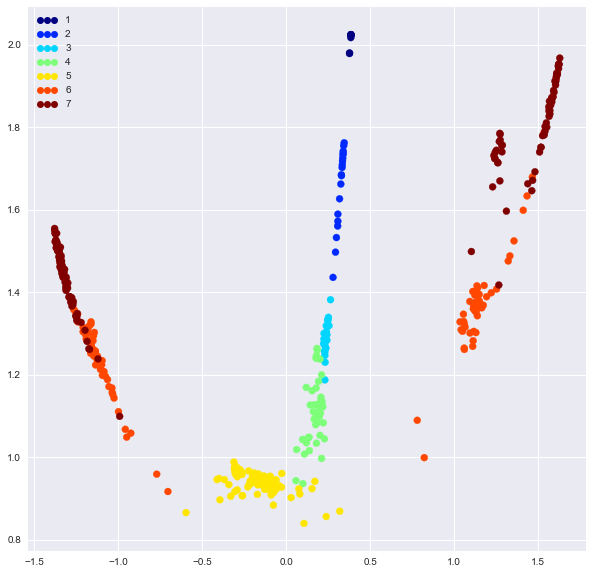

In [5]:
z.plotY(size=(10,10),dims=[0,1],color ='stages')

(10, 10)


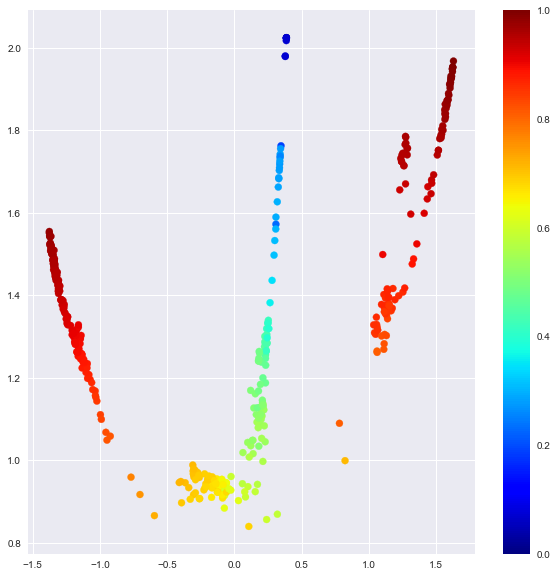

In [6]:
root_list = list(np.where(time_stages.values == 1)[0])
dftimes = z.get_dtflow_times(root_list)
np.savetxt("guo2010_dtflow_times.csv",dftimes,delimiter=',')
z.plotY(size=(10,10),dims=[0,1],color ='dftime')

(10, 10)


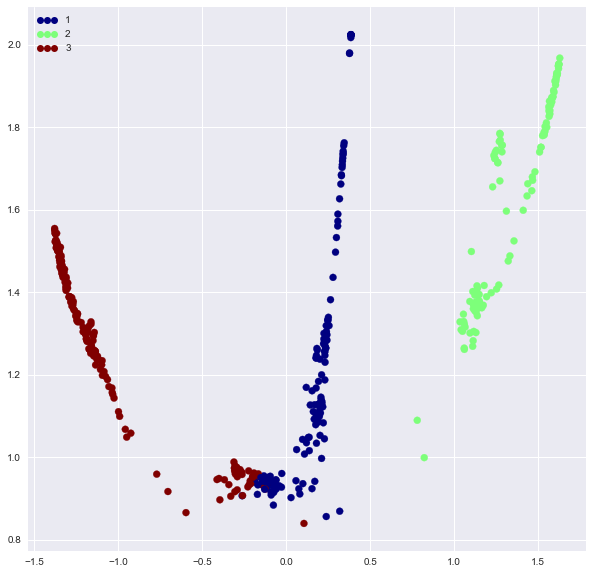

In [7]:
branch = z.get_branches(Num=112,delta = 0.9) # 1-11 12-112 
z.plotY(size=(10,10),dims= [0,1],color ='branches')

In [8]:
# np.savetxt("guo2010_types.csv",time_stages,delimiter=',')
# np.savetxt("guo2010_dtflow_Y.csv",Y,delimiter=',')
# np.savetxt("guo2010_branch5.csv",branch5,delimiter=',')
# np.savetxt("guo2010_branch3.csv",branch3,delimiter=',')